# __KPMG Data Quality Assessment for Sprocket Central__

In [1]:
# Import packages
import os
os.chdir('C:\\Users\\david\\OneDrive\\桌面\\Job Getter\\Virtual Internship\\KPMG\Module 1')
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import missingno as msno

In [2]:
# Set aesthetics
sns.set()

In [3]:
# Import data
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final - Copy.xlsx')
xls.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [4]:
df1 = pd.read_excel(xls, 'Transactions', header=1)
df2 = pd.read_excel(xls, 'CustomerDemographic', header=1)
df3 = pd.read_excel(xls, 'CustomerAddress', header=1)

## I.Transactions

In [5]:
# Take a look at the data
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>__Issue 1.__ A lot of Unnamed columns appear and we assume this indicates a data extraction error. As there is no value in these columns, they are deleted.

In [6]:
# Filter out Unnamed columns
df1 = df1[df1.filter(regex='^(?!Unnamed)').columns]
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
# Summary of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

>__Issue 2.__ All columns are in the right format except for 'product_first_sold_date', which should be datetime not float.

In [8]:
# Change the format of 'product_first_sold_date' 
df1['product_first_sold_date'] = pd.TimedeltaIndex(df1['product_first_sold_date'], unit='d') + dt.datetime(1899, 12, 30)

In [9]:
df1['product_first_sold_date'].dtype

dtype('<M8[ns]')

In [10]:
df1.sort_values(by='transaction_date').head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
516,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09
5876,5877,67,138,2017-01-01,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
3459,3460,64,234,2017-01-01,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24
12484,12485,85,2805,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,2000-05-22
19130,19131,0,1707,2017-01-01,0.0,Approved,Trek Bicycles,Road,medium,medium,290.62,215.14,2004-12-18


<AxesSubplot:xlabel='transaction_date', ylabel='Count'>

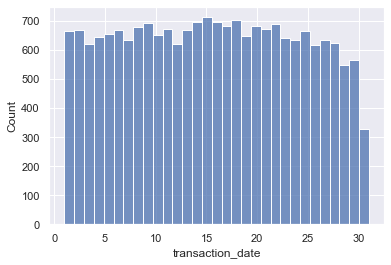

In [11]:
# Check for irregularity in the days 
sns.histplot(df1['transaction_date'].dt.day, kde=False, bins=31)

In [12]:
df1.sort_values(by='product_first_sold_date').head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
13882,13883,98,725,2017-03-14,0.0,Approved,OHM Cycles,Standard,medium,medium,795.34,101.58,1991-01-21
13411,13412,57,1531,2017-03-11,1.0,Approved,WeareA2B,Touring,medium,large,1890.39,260.14,1991-01-21
1548,1549,0,240,2017-09-14,0.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1991-01-21
11494,11495,56,2703,2017-09-18,0.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1991-01-21
10036,10037,57,235,2017-07-27,0.0,Approved,WeareA2B,Touring,medium,large,1890.39,260.14,1991-01-21


In [13]:
df1['product_first_sold_date'].describe(datetime_is_numeric=True)

count                            19803
mean     2004-07-31 18:38:13.834267392
min                1991-01-21 00:00:00
25%                1997-08-25 00:00:00
50%                2004-08-17 00:00:00
75%                2011-05-09 00:00:00
max                2016-12-06 00:00:00
Name: product_first_sold_date, dtype: object

<AxesSubplot:xlabel='product_first_sold_date', ylabel='Count'>

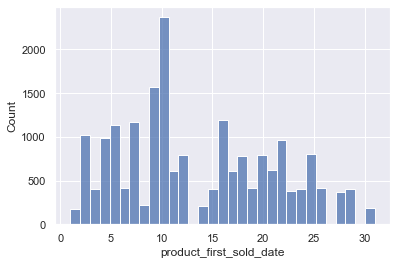

In [14]:
sns.histplot(df1['product_first_sold_date'].dt.day, kde=False, bins=31)

In [15]:
df1['product_first_sold_date'].isna().sum()

197

In [16]:
valid_trans = df1['transaction_date'] > df1['product_first_sold_date']
df1[~valid_trans]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [17]:
# Uniqueness
duplicates = df1.duplicated(subset = ['transaction_id'], keep = False)  # We assume that transaction_id is the primary key
df1[duplicates] 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


>No duplicates found

In [18]:
df1['product_id'].describe()

count    20000.00000
mean        45.36465
std         30.75359
min          0.00000
25%         18.00000
50%         44.00000
75%         72.00000
max        100.00000
Name: product_id, dtype: float64

<AxesSubplot:xlabel='product_id', ylabel='Count'>

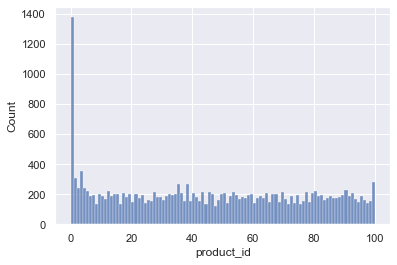

In [19]:
sns.histplot(df1['product_id'], kde=False, bins=100)

>__Issue 3.__ Count for product_id 0 is suspiciously high, maybe some of these were recorded incorrectly.

In [20]:
df1['customer_id'].nunique()

3494

In [21]:
duplicates_cus = df1.duplicated(subset = ['customer_id'], keep = False)
df1_multibuy = df1[duplicates_cus].groupby('customer_id').agg({'transaction_id':'count', 'list_price':'sum'}).sort_values(by='transaction_id', ascending=False)

In [22]:
df1_multibuy.head()

,transaction_id,list_price
customer_id,,
1068,14,14254.55
2183,14,19071.32
2476,14,14578.69
1302,13,17035.83
2755,13,14088.24


<AxesSubplot:xlabel='transaction_id', ylabel='Count'>

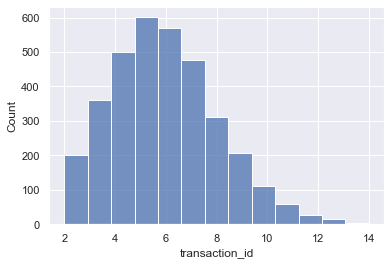

In [23]:
sns.histplot(df1_multibuy['transaction_id'], bins=13)

In [24]:
col = df1.columns.to_list()
print(col)

['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date']


In [25]:
cat_col = col[4:-3]
print(cat_col)

['online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size']


In [26]:
for col in cat_col:
    print(df1[col].value_counts())
    print(df1[col].describe())

1.0    9829
0.0    9811
Name: online_order, dtype: int64
count    19640.000000
mean         0.500458
std          0.500013
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: online_order, dtype: float64
Approved     19821
Cancelled      179
Name: order_status, dtype: int64
count        20000
unique           2
top       Approved
freq         19821
Name: order_status, dtype: object
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64
count     19803
unique        6
top       Solex
freq       4253
Name: brand, dtype: object
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64
count        19803
unique           4
top       Standard
freq         14176
Name: product_line, dtype: object
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [27]:
df1['online_order'] = df1['online_order'].astype('category')

In [28]:
df1['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [29]:
df1['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

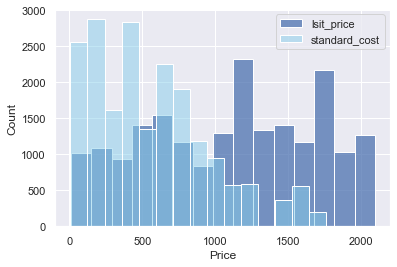

In [30]:
sns.histplot(data=df1, x='list_price', label='lsit_price', bins=15)
sns.histplot(data=df1, x='standard_cost', label='standard_cost', alpha=0.5, color='skyblue', bins=15)
plt.xlabel('Price')
plt.legend()

In [32]:
# Missing data
missing_df1 = df1.isna().sum()
missing_df1 = missing_df1[missing_df1 > 0]
missing_percentage_df1 = round(missing_df1/df1.shape[0]*100,2)
pd.DataFrame({'na_count': missing_df1, 'na_%': missing_percentage_df1}).sort_values(by = 'na_%', ascending = False)

,na_count,na_%
online_order,360,1.80
brand,197,0.98
product_line,197,0.98
product_class,197,0.98
product_size,197,0.98
standard_cost,197,0.98
product_first_sold_date,197,0.98


<AxesSubplot:>

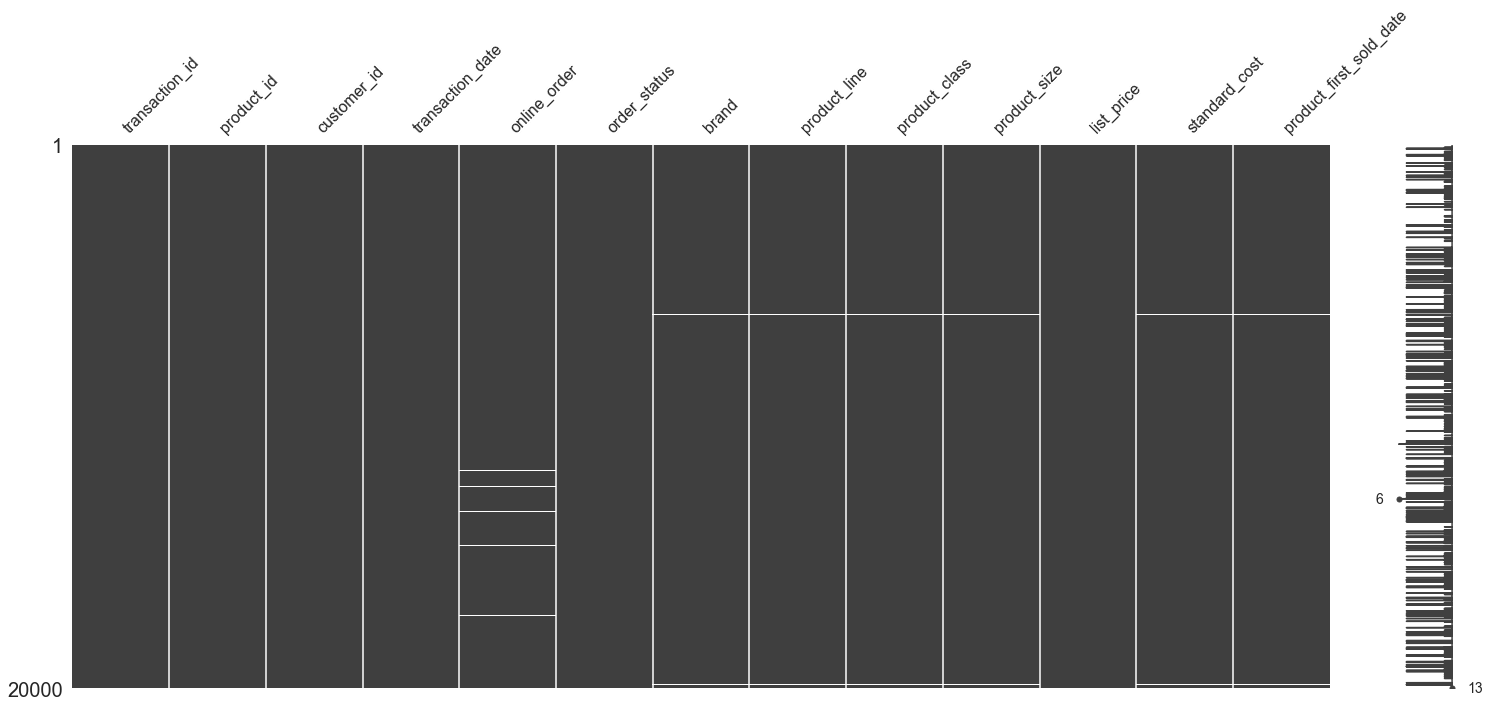

In [33]:
# Visualise missing data 
msno.matrix(df1)

>__Inssue 4.__ Missing percentages are low and all seems to be MCAR (missing completed at random).

## II.Customer Demographic

>A lot of Unnamed columns appear and we assume this indicates a data extraction error. As there is no value in these columns, they are filtered out.

In [34]:
# Summary of data
df2 = df2[df2.filter(regex='^(?!Unnamed)').columns]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

>All columns are in the right format.

In [35]:
# Take a look at the data
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


>1. There are some missing values in several columns
>2. In 'gender' column, the category name is not consistent 

> __Issue 5.__ default' column contains many garbled characters, which indicates a data extraction error. Decription of the column and the cause of this issue are required. For analysis purpase, we assume that this variable is irrelevant and should be removed.

In [36]:
# Drop the 'default' column
df2.drop('default', axis=1, inplace=True)

<AxesSubplot:xlabel='DOB', ylabel='Count'>

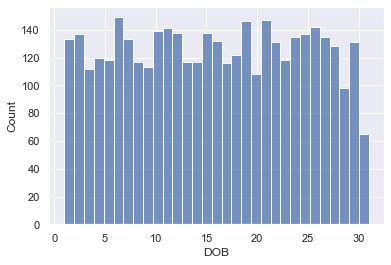

In [37]:
sns.histplot(df2['DOB'].dt.day, bins=31)

<AxesSubplot:xlabel='DOB', ylabel='Count'>

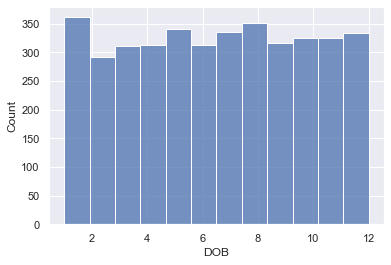

In [38]:
sns.histplot(df2['DOB'].dt.month, bins=12)

In [39]:
df2.sort_values(by = 'DOB').head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
657,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
1242,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,No,8.0
1564,1565,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,N,Yes,11.0
1176,1177,Bobbette,Pozzi,Female,47,1953-08-31,Food Chemist,Health,Affluent Customer,N,Yes,6.0
3470,3471,Brita,Afonso,Female,95,1953-09-05,Quality Engineer,IT,High Net Worth,N,Yes,8.0


>__Issue 6.__ The birthday of customer_id 34 is out of range and should be checked.

In [40]:
# Uniqueness 
duplicates = df2.duplicated(subset = ['first_name', 'last_name'], keep = False) # based on the assumption that the combination of first_name and last_name is the primary kery for this data 
df2[duplicates].sort_values(by = 'first_name')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
937,938,Corabelle,NaN,Female,18,1996-04-06,Technical Writer,Retail,Mass Customer,N,No,7.0
1904,1905,Corabelle,NaN,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,No,15.0
1089,1090,Lorettalorna,NaN,Female,15,1975-07-15,Computer Systems Analyst II,Telecommunications,Affluent Customer,N,No,17.0
1350,1351,Lorettalorna,NaN,U,32,NaT,Office Assistant IV,IT,High Net Worth,N,No,NaN


In [41]:
df2['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

>__Issue 7.__ Categories in the gender column are inconsisten. We shall limit the cateogories to ['F', 'M', 'U']

In [42]:
df2 = df2.replace({'gender' : { 'Femal' : 'F', 'Female' : 'F', 'M' : 'M', 'Male':'M'}})
df2['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [43]:
df2[df2['gender'] =='U']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [44]:
df2[df2['gender'] =='U']['DOB'].value_counts()

1843-12-21    1
Name: DOB, dtype: int64

>1.DOB is missing for unkonwn genders.   
2.There are 88 records with unknow gender. This information should be provided.

In [45]:
df2['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [46]:
df2['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [47]:
df2['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

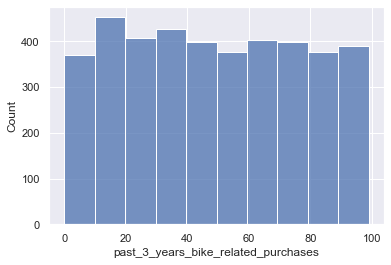

In [48]:
sns.histplot(df2['past_3_years_bike_related_purchases'], kde=False, bins=10)

In [49]:
df2['tenure'].describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

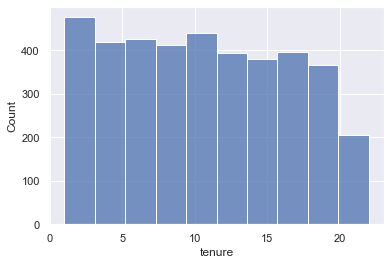

In [50]:
sns.histplot(df2['tenure'], kde=False, bins=10)

In [51]:
# Missing data
missing2 = df2.isna().sum()
missing2 = missing2[missing2 > 0]
missing2_percentage = round(missing2/df2.shape[0]*100,2)
pd.DataFrame({'na_count': missing2, 'na_%': missing2_percentage}).sort_values(by = 'na_%', ascending = False)

,na_count,na_%
job_industry_category,656,16.40
job_title,506,12.65
last_name,125,3.12
DOB,87,2.17
tenure,87,2.17


<AxesSubplot:>

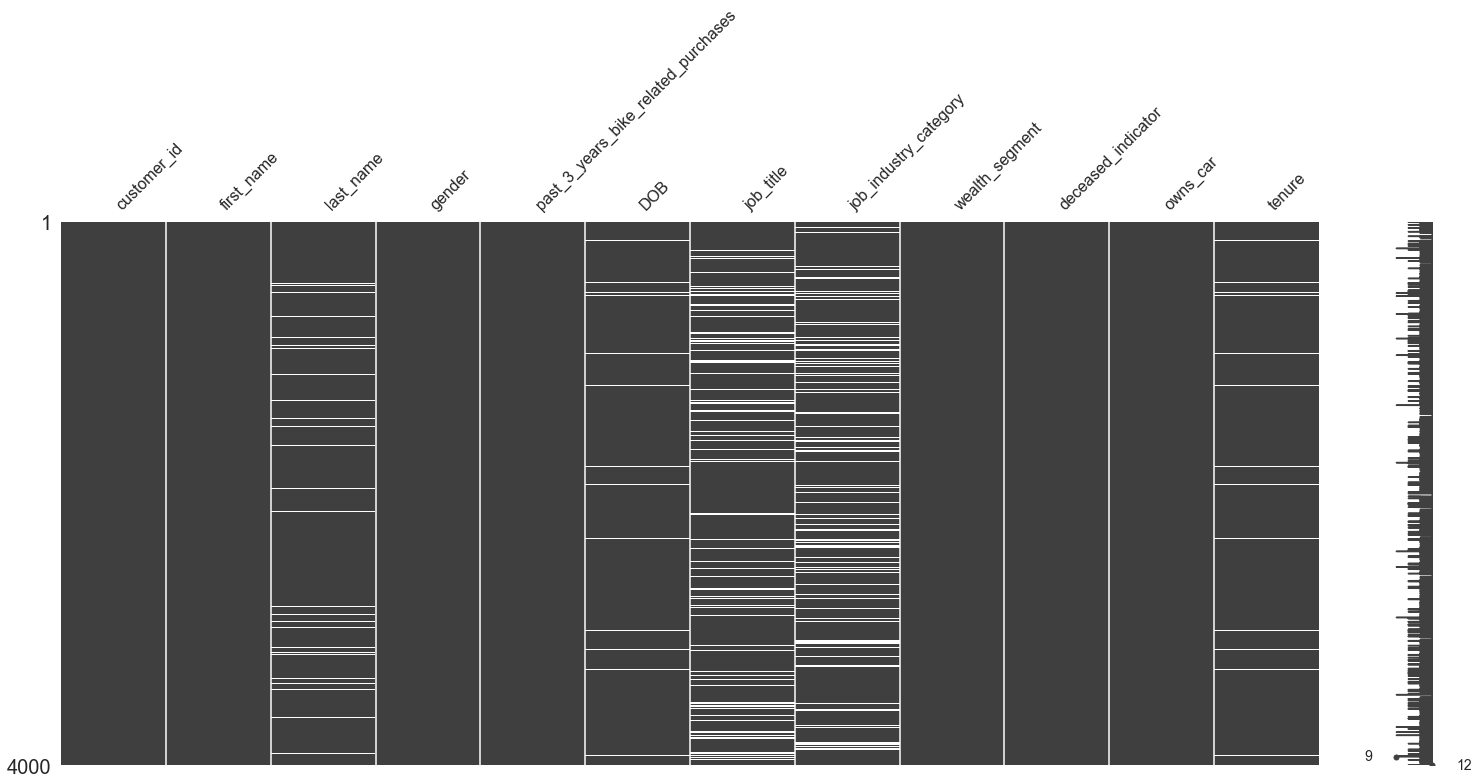

In [52]:
# Visualise missing data
msno.matrix(df2)

>__Index 8.__ The percetage of missing data is pretty high for job_industry category and job_titles, further explanation required. Based on the visualisation, it seems like data are MCAR. Therefore, it's likely a result of data collection error.

## III.Customer Address

In [53]:
# Summary of data
df3 = df3[df3.filter(regex='^(?!Unnamed)').columns]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


>All formats are correct and no missing value.

In [54]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [55]:
df3['customer_id'].describe()

count    3999.000000
mean     2003.987997
std      1154.576912
min         1.000000
25%      1004.500000
50%      2004.000000
75%      3003.500000
max      4003.000000
Name: customer_id, dtype: float64

In [56]:
list = range(df3['customer_id'].min(), df3['customer_id'].max())
s = pd.Series(list)
s[~s.isin(df3['customer_id'])]

2      3
9     10
21    22
22    23
dtype: int64

>__Issue 9.__ Data is missing for cutomer_id 3,10, 22, 23.

In [57]:
df3['postcode'].astype(str).str.len().value_counts()

4    3999
Name: postcode, dtype: int64

In [58]:
df3['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

>__Issue 10.__ Inconsitent categories. We limit the categories to the abbreviations.

In [59]:
df3 = df3.replace({'state': {'New South Wales': 'NSW', 'Victoria': 'VIC'}})
df3['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [60]:
df3['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [61]:
df3['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

<AxesSubplot:xlabel='property_valuation', ylabel='Count'>

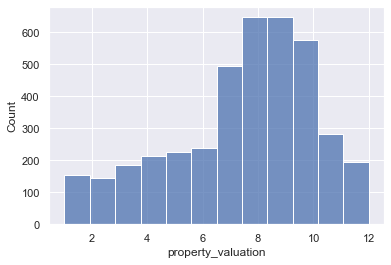

In [62]:
sns.histplot(df3['property_valuation'], bins=12)

In [63]:
# Uniqueness
df3['customer_id'].nunique()

3999

In [64]:
df3['address'].nunique()

3996

In [65]:
duplicates_df3 = df3.duplicated(subset=['address'], keep=False)
df3[duplicates_df3].sort_values(by='address')

,customer_id,address,postcode,state,country,property_valuation
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
732,737,3 Talisman Place,4811,QLD,Australia,2
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


In [66]:
# Export DataFrames to Excel
with pd.ExcelWriter('KPMG_VI_New_raw_data_update_final - Cleaned.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Transactions', index=False)
    df2.to_excel(writer, sheet_name='CustomerDemographic', index=False)
    df3.to_excel(writer, sheet_name='CustomerAddress', index=False)